# Final Project 1 - Linear Regression

Kelompok 5:
- Kevin Anggara Putra
- Daniel Leksono
- Ines Savitri

### A. Perkenalan

### Data Overview:
[Referensi : Uber and Lyft Dataset Boston, MA]

- id : Unique identifier for each column
- timestamp : Unix timestamp
- hour : Hour of the day
- day : Day of the week
- month : Month in a year
- datetime : Date value
- timezone : Timezone
- source : Initial source of the ride
- destination : Destination of the ride
- cab_type : The type of cab
- price : Price of the ride
- distance : Total distance of the requested ride
- surge_multiplier : Times of the normal price
- temperature : Temperature of the ride
- apparentTemperature : Apparent temperatur of the ride
- summary : Weather report summary of the day
- humidity : Humidity of the ride
- windSpeed : Wind speed of the ride
- windGust : Wind gust of the ride
- uvIndex : UV index of the ride

Database ini memiliki 57 atribut, berasal dari Kaggle yaiut Uber and Lyft Dataset Boston, MA dari 11-26-2018 hingga 12-18-2081. Akan digunakan analisis Data Uber, dan di terapkan model analisa Linear Regression yang bertujuan untuk memprediksi hubungan antar variable.

### B. Import pustaka yang dibutuhkan

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import seaborn as sns
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler, LabelEncoder

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

from sklearn.metrics import r2_score, auc
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import explained_variance_score

### C. Data Loading

In [2]:
# Download Datasets
df = pd.read_csv('rideshare_kaggle.csv').copy()
pd.set_option('display.max_columns', None)

df.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,lyft_line,Shared,5.0,0.44,1.0,42.2148,-71.033,42.34,37.12,Mostly Cloudy,Rain throughout the day.,0.0000,0.0,0.68,8.66,9.17,1545015600,10.000,43.68,1544968800,34.19,1545048000,37.95,1544968800,27.39,1545044400,partly-cloudy-night,32.70,1021.98,57,0.72,0,10.000,303.8,1544962084,1544994864,0.30,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,lyft_premier,Lux,11.0,0.44,1.0,42.2148,-71.033,43.58,37.35,Rain,"Rain until morning, starting again in the eve...",0.1299,1.0,0.94,11.98,11.98,1543291200,4.786,47.30,1543251600,42.10,1543298400,43.92,1543251600,36.20,1543291200,rain,41.83,1003.97,90,1.00,0,4.786,291.1,1543232969,1543266992,0.64,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,lyft,Lyft,7.0,0.44,1.0,42.2148,-71.033,38.33,32.93,Clear,Light rain in the morning.,0.0000,0.0,0.75,7.33,7.33,1543334400,10.000,47.55,1543320000,33.10,1543402800,44.12,1543320000,29.11,1543392000,clear-night,31.10,992.28,240,0.03,0,10.000,315.7,1543319437,1543353364,0.68,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,lyft_luxsuv,Lux Black XL,26.0,0.44,1.0,42.2148,-71.033,34.38,29.63,Clear,Partly cloudy throughout the day.,0.0000,0.0,0.73,5.28,5.28,1543514400,10.000,45.03,1543510800,28.90,1543579200,38.53,1543510800,26.20,1543575600,clear-night,26.64,1013.73,310,0.00,0,10.000,291.1,1543492370,1543526114,0.75,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,lyft_plus,Lyft XL,9.0,0.44,1.0,42.2148,-71.033,37.44,30.88,Partly Cloudy,Mostly cloudy throughout the day.,0.0000,0.0,0.70,9.14,9.14,1543446000,10.000,42.18,1543420800,36.71,1543478400,35.75,1543420800,30.29,1543460400,partly-cloudy-night,28.61,998.36,303,0.44,0,10.000,347.7,1543405904,1543439738,0.72,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


In [3]:
# Mengetahui jumlah data dan kolom
df.shape

(693071, 57)

Dari ouput di atas, dapat kita ketahui seluruh data berjumlah 57 kolom dan 693.071 baris

In [4]:
df['cab_type'].value_counts()

Uber    385663
Lyft    307408
Name: cab_type, dtype: int64

### D. Data Cleaning

Dari output di atas dapat kita ketahui bahwa pada kolom 'price' terdapat missing value sebanyak 55.095, maka data harus dibersihkan

In [5]:
#Melihat infromasi tipe-tipe data tiap kolom pada dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

In [6]:
for col in df.columns :
  print(col, 'Unique Value')
  print(df[col].unique())
  print('-'*100)

id Unique Value
['424553bb-7174-41ea-aeb4-fe06d4f4b9d7'
 '4bd23055-6827-41c6-b23b-3c491f24e74d'
 '981a3613-77af-4620-a42a-0c0866077d1e' ...
 '64d451d0-639f-47a4-9b7c-6fd92fbd264f'
 '727e5f07-a96b-4ad1-a2c7-9abc3ad55b4e'
 'e7fdc087-fe86-40a5-a3c3-3b2a8badcbda']
----------------------------------------------------------------------------------------------------
timestamp Unique Value
[1.54495261e+09 1.54328402e+09 1.54336682e+09 ... 1.54377528e+09
 1.54507051e+09 1.54473900e+09]
----------------------------------------------------------------------------------------------------
hour Unique Value
[ 9  2  1  4  3 18  5 19  6 10 16 22 23  0 14 11  7 20 13  8 12 21 17 15]
----------------------------------------------------------------------------------------------------
day Unique Value
[16 27 28 30 29 17 26  2  3 13 14  1 18 15  4 10  9]
----------------------------------------------------------------------------------------------------
month Unique Value
[12 11]
--------------------------

[' Mostly Cloudy ' ' Rain ' ' Clear ' ' Partly Cloudy ' ' Overcast '
 ' Light Rain ' ' Foggy ' ' Possible Drizzle ' ' Drizzle ']
----------------------------------------------------------------------------------------------------
long_summary Unique Value
[' Rain throughout the day. '
 ' Rain until morning, starting again in the evening. '
 ' Light rain in the morning. ' ' Partly cloudy throughout the day. '
 ' Mostly cloudy throughout the day. '
 ' Light rain in the morning and overnight. '
 ' Light rain until evening. ' ' Foggy in the morning. '
 ' Overcast throughout the day. ' ' Possible drizzle in the morning. '
 ' Rain in the morning and afternoon. ']
----------------------------------------------------------------------------------------------------
precipIntensity Unique Value
[0.     0.1299 0.0246 0.0624 0.0567 0.0036 0.007  0.1088 0.0341 0.0308
 0.0094 0.0013 0.0053 0.002  0.1264 0.0216 0.005  0.008  0.0288 0.0488
 0.0074 0.0017 0.0023 0.0274 0.0015 0.0031 0.0923 0.092  0.018

[' partly-cloudy-night ' ' rain ' ' clear-night ' ' cloudy ' ' fog '
 ' clear-day ' ' partly-cloudy-day ']
----------------------------------------------------------------------------------------------------
dewPoint Unique Value
[32.7  41.83 31.1  26.64 28.61 34.41 39.54 48.02 44.5  43.52 27.99 29.72
 27.31 10.87 18.66 37.56 20.53 26.83 27.53 30.94 34.56  9.22 27.27 35.13
 39.47 31.96 31.67 43.32 31.63 30.89 47.81 40.83 46.13 29.78 36.81 28.31
 28.08 35.8  26.84 22.79 43.75 28.39 32.52 33.96 44.71 28.91 26.45 41.5
 31.68 27.12 45.86 39.51 46.76 29.86 41.98 47.14 19.51  9.15 29.27 44.19
 29.57 29.33  9.85 27.14 46.7  26.98 50.67 35.31 27.26 48.54 44.89 28.96
 31.61  9.98 31.95 27.2  28.36  7.06 36.14 27.29  8.55 35.26 28.63 28.1
 43.94 37.03 26.99 29.42 44.36 36.27 31.82 10.7  39.17 13.07 15.74 34.28
 32.42 45.78  6.46 27.65 29.05 34.39 27.87 26.59 44.14 49.27 31.05 27.51
  9.69 27.86 22.07 42.99 42.14 23.09 32.99 41.99  6.89 33.41 10.29 32.91
 39.68 32.06 26.27 41.58 39.06 33.58 14.76

[1545012000 1543291200 1543377600 1543550400 1543392000 1545044400
 1543748400 1543896000 1543579200 1543399200 1543575600 1544688000
 1545019200 1543658400 1545134400 1544929200 1544788800 1544781600
 1543568400 1543662000 1543744800 1544785200 1544346000 1544673600
 1543982400 1544356800 1543557600 1544342400 1543136400]
----------------------------------------------------------------------------------------------------
apparentTemperatureMax Unique Value
[38.07 43.92 44.12 38.53 35.75 34.97 43.81 50.13 56.35 44.01 40.48 36.75
 40.53 32.85 38.38 38.21 43.99 38.39 43.85 31.92 38.3  43.84 35.88 53.62
 44.15 43.71 50.06 50.27 36.58 53.8  43.44 57.2  52.19 36.57 53.73 31.96
 40.95 49.7  38.85 43.93 32.84 36.09 41.38 44.06 32.03 36.77 38.4  43.86
 35.95 36.56 56.6  56.75 43.32 44.24 32.95 29.98 50.45 38.34 36.55 50.32
 44.14 56.37 44.05 38.51 43.88 43.78 32.1  36.11 38.35 38.93 43.98 40.51
 56.85 39.02 53.81 56.22 36.21 43.38 32.82 43.82 31.85 43.97 43.7  38.29
 44.13 32.93 38.37 31.84 38

In [7]:
# Membersihkan data dengan melihat standar missing value
df.isnull().sum()

id                                 0
timestamp                          0
hour                               0
day                                0
month                              0
datetime                           0
timezone                           0
source                             0
destination                        0
cab_type                           0
product_id                         0
name                               0
price                          55095
distance                           0
surge_multiplier                   0
latitude                           0
longitude                          0
temperature                        0
apparentTemperature                0
short_summary                      0
long_summary                       0
precipIntensity                    0
precipProbability                  0
humidity                           0
windSpeed                          0
windGust                           0
windGustTime                       0
v

In [8]:
df.isnull().values.any()

True

In [9]:
# Drop missing value pada kolom 'price'
df.dropna(axis=0, inplace=True)

In [10]:
df.isnull().sum().sum()

0

In [11]:
# Cek duplikasi data
df.duplicated().any()

False

In [12]:
# Menghapus kolom yang data nya tidak di butuhkan

In [13]:
data_final = df[['source', 'destination', 'cab_type', 'name', 'price', 'distance', 'surge_multiplier']]
data_final.head(5)

,source,destination,cab_type,name,price,distance,surge_multiplier
0,Haymarket Square,North Station,Lyft,Shared,5.0,0.44,1.0
1,Haymarket Square,North Station,Lyft,Lux,11.0,0.44,1.0
2,Haymarket Square,North Station,Lyft,Lyft,7.0,0.44,1.0
3,Haymarket Square,North Station,Lyft,Lux Black XL,26.0,0.44,1.0
4,Haymarket Square,North Station,Lyft,Lyft XL,9.0,0.44,1.0


In [14]:
# Mengubah nilai kolom cab_type dari object menjadi numerik
d = {'Lyft':1, 'Uber':2}
data_final['cab_type'] = data_final['cab_type'].map(d)

In [15]:
data_final

,source,destination,cab_type,name,price,distance,surge_multiplier
0,Haymarket Square,North Station,1,Shared,5.0,0.44,1.0
1,Haymarket Square,North Station,1,Lux,11.0,0.44,1.0
2,Haymarket Square,North Station,1,Lyft,7.0,0.44,1.0
3,Haymarket Square,North Station,1,Lux Black XL,26.0,0.44,1.0
4,Haymarket Square,North Station,1,Lyft XL,9.0,0.44,1.0
...,...,...,...,...,...,...,...
693065,West End,North End,2,WAV,9.5,1.00,1.0
693066,West End,North End,2,UberXL,13.0,1.00,1.0
693067,West End,North End,2,UberX,9.5,1.00,1.0
693069,West End,North End,2,Black SUV,27.0,1.00,1.0


In [16]:
# Cek data final
data_final.duplicated().sum()

557509

In [17]:
data_final.shape

(637976, 7)

In [18]:
data_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 637976 entries, 0 to 693070
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   source            637976 non-null  object 
 1   destination       637976 non-null  object 
 2   cab_type          637976 non-null  int64  
 3   name              637976 non-null  object 
 4   price             637976 non-null  float64
 5   distance          637976 non-null  float64
 6   surge_multiplier  637976 non-null  float64
dtypes: float64(3), int64(1), object(3)
memory usage: 38.9+ MB


In [19]:
data_final.describe()

,cab_type,price,distance,surge_multiplier
count,637976.000000,637976.000000,637976.000000,637976.000000
mean,1.518151,16.545125,2.189261,1.015068
std,0.499671,9.324359,1.135413,0.095422
min,1.000000,2.500000,0.020000,1.000000
25%,1.000000,9.000000,1.270000,1.000000
50%,2.000000,13.500000,2.160000,1.000000
75%,2.000000,22.500000,2.930000,1.000000
max,2.000000,97.500000,7.860000,3.000000


### E. Explorasi Data

In [20]:
# Mengetahui korelasi antar data

corr_mat = df.corr(method='pearson')
  
# Retain upper triangular values of correlation matrix and
# make Lower triangular values Null
upper_corr_mat = corr_mat.where(
    np.triu(np.ones(corr_mat.shape), k=1).astype(np.bool))
  
# Convert to 1-D series and drop Null values
unique_corr_pairs = upper_corr_mat.unstack().dropna()
  
# Sort correlation pairs
sorted_mat = unique_corr_pairs.sort_values()

print(sorted_mat)

month                        day                   -0.861325
moonPhase                    windGustTime          -0.854638
                             timestamp             -0.846279
apparentTemperatureMinTime   moonPhase             -0.846008
temperatureMaxTime           moonPhase             -0.845285
                                                      ...   
apparentTemperatureHighTime  temperatureHighTime    0.999986
uvIndexTime                  sunriseTime            0.999997
                             sunsetTime             0.999997
sunsetTime                   sunriseTime            1.000000
visibility.1                 visibility             1.000000
Length: 1035, dtype: float64


In [21]:
df.corr()

,timestamp,hour,day,month,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
timestamp,1.000000,-0.028501,-0.341420,0.771245,0.000808,0.003290,0.000611,0.168295,-0.136716,-0.249027,-0.226472,-0.179834,-0.147351,-0.167740,-0.066364,0.005565,0.998843,0.158577,-0.228324,0.999332,-0.366885,0.999175,-0.215550,0.999312,-0.402043,0.999204,-0.265512,0.533074,-0.133853,-0.081522,-0.025986,0.158577,0.196566,0.999372,0.999372,-0.846279,-0.211887,0.999364,-0.307194,0.998195,-0.186495,0.999290,-0.378538,0.998288,-0.157891,0.999276
hour,-0.028501,1.000000,0.066223,-0.079734,0.000561,0.002283,-0.000067,0.019228,-0.005986,0.218829,0.198212,-0.233246,-0.129631,-0.275778,0.073011,0.077646,-0.028544,0.173776,0.005191,-0.028323,0.015000,-0.027267,0.005518,-0.028481,0.015722,-0.027438,0.004863,-0.067787,0.036292,0.026680,0.330326,0.173776,0.034035,-0.028016,-0.028014,0.020997,0.020288,-0.027997,0.015668,-0.027486,0.002982,-0.028479,0.015882,-0.028172,0.002904,-0.028273
day,-0.341420,0.066223,1.000000,-0.861325,-0.000722,-0.000992,0.001397,0.006744,0.078539,-0.083934,-0.223410,0.091513,0.030765,-0.093376,0.440512,0.402611,-0.336560,0.105210,-0.283410,-0.343251,-0.088370,-0.333686,-0.398099,-0.343422,-0.192984,-0.335630,-0.101470,-0.444738,0.092226,-0.041103,-0.012083,0.105210,0.376791,-0.341201,-0.341145,-0.007038,0.145789,-0.341330,0.038089,-0.334118,-0.304704,-0.344669,-0.019878,-0.335176,-0.444366,-0.344546
month,0.771245,-0.079734,-0.861325,1.000000,0.000913,0.002402,-0.000612,0.085946,-0.126763,-0.082048,0.024773,-0.154356,-0.097803,-0.022078,-0.334897,-0.270541,0.767339,0.011129,0.068094,0.772119,-0.138703,0.765551,0.152479,0.772227,-0.087019,0.766883,-0.074906,0.589683,-0.135317,-0.016767,-0.012340,0.011129,-0.149111,0.770749,0.770712,-0.452655,-0.213301,0.770832,-0.191928,0.765319,0.105113,0.773057,-0.191293,0.766097,0.214928,0.772962
price,0.000808,0.000561,-0.000722,0.000913,1.000000,0.345061,0.240458,0.002088,-0.001417,-0.000084,-0.000193,0.000166,-0.000243,-0.001238,0.000990,0.001218,0.000851,0.001497,-0.000516,0.000759,0.000182,0.000754,-0.000261,0.000741,0.000831,0.000761,-0.000615,0.000866,-0.001382,0.000883,-0.000424,0.001497,0.000460,0.000760,0.000760,-0.001602,0.001114,0.000763,-0.000428,0.000769,-0.000550,0.000766,-0.000580,0.000814,-0.000290,0.000746
distance,0.003290,0.002283,-0.000992,0.002402,0.345061,1.000000,0.025946,0.000984,-0.000415,-0.002738,-0.002835,-0.000512,0.000134,-0.003849,0.001709,0.000920,0.003371,0.004143,-0.003795,0.003338,-0.001744,0.003282,-0.003699,0.003317,-0.001006,0.003311,-0.003920,0.003565,-0.002638,-0.000958,0.002422,0.004143,0.001206,0.003291,0.003291,-0.004301,0.000670,0.003298,-0.003192,0.003166,-0.003875,0.003318,-0.003649,0.003266,-0.003889,0.003319
surge_multiplier,0.000611,-0.000067,0.001397,-0.000612,0.240458,0.025946,1.000000,0.001471,-0.001961,-0.001594,-0.002586,-0.001522,-0.002825,-0.001677,0.002593,0.002162,0.000477,0.001716,-0.001943,0.000560,-0.002669,0.000614,-0.002098,0.000559,-0.003088,0.000592,-0.001860,-0.003109,0.002171,-0.002101,-0.002567,0.001716,0.003456,0.000585,0.000585,-0.000163,-0.000090,0.000585,-0.000716,0.000594,-0.001998,0.000563,-0.001317,0.000502,-0.002214,0.000559
latitude,0.168295,0.019228,0.006744,0.085946,0.002088,0.000984,0.001471,1.000000,-0.531443,-0.098909,-0.067427,-0.074306,-0.071331,-0.117721,-0.097125,0.024346,0.172786,0.124286,-0.115623,0.173857,-0.032005,0.171345,-0.092459,0

Explorasi data pada data_final dengan menggunakan query , grouping, visualisasi sederhana, dan lain sebagainya.

<AxesSubplot:xlabel='cab_type', ylabel='price'>

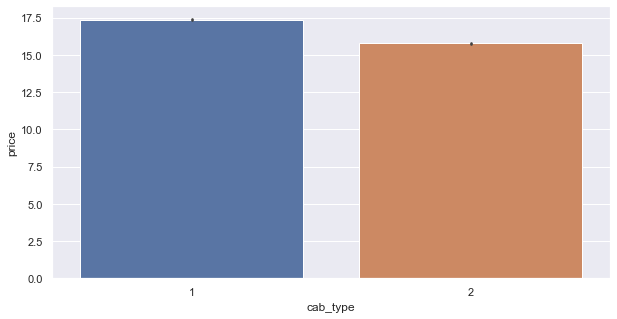

In [22]:
# 1. Manakah yang lebih mahal, antara Uber atau Lyft
sns.set(rc={'figure.figsize':(10,5)})
sns.barplot(x='cab_type', y='price', data = data_final)

In [23]:
data_final.groupby('cab_type')['price'].mean()

cab_type
1    17.351396
2    15.795343
Name: price, dtype: float64

Dari output di atas dapat kita ketahui bahwa Lfyt harganya lebih mahal dari Uber, dengan rata-rata harga Lyft berkisar 17.3 dollar, dan Uber berkisaar 15.7 dollar 

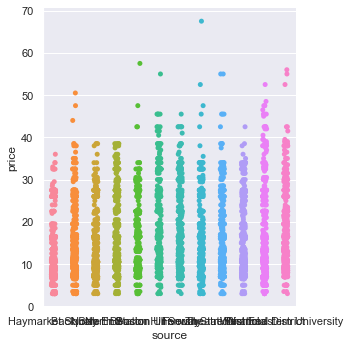

In [24]:
# 2. Bagaimana korelasi antara titik keberangkatan dengan harga yang di pesan?
sns.catplot(x='source', y='price', data=data_final[:5000])

In [25]:
data_final.groupby('source')['price'].mean()

source
Back Bay                   16.047394
Beacon Hill                15.664030
Boston University          18.853034
Fenway                     18.379491
Financial District         18.181372
Haymarket Square           13.578114
North End                  15.153373
North Station              16.364006
Northeastern University    17.901124
South Station              15.672479
Theatre District           16.596994
West End                   16.108498
Name: price, dtype: float64

Dari output di atas dapat kita ketahui titik keberangkatan paling banyak dipesan penumpang pada daerah Boston Universitu dan Fenway

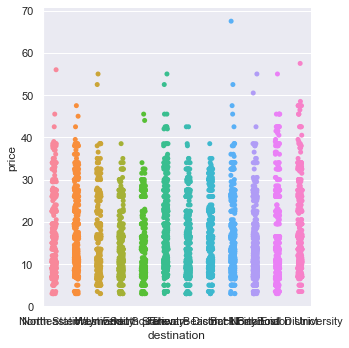

In [26]:
# 3. Bagaimana korelasi antara titik tujuan dengan harga yang di pesan?
sns.catplot(x='destination', y='price', data=data_final[:5000])

In [27]:
data_final.groupby('destination')['price'].mean()

destination
Back Bay                   16.210152
Beacon Hill                16.248335
Boston University          18.942137
Fenway                     18.146419
Financial District         18.046280
Haymarket Square           14.255553
North End                  15.002210
North Station              16.805238
Northeastern University    17.827517
South Station              14.828549
Theatre District           15.974450
West End                   16.225843
Name: price, dtype: float64

Dari output di atas dapat kita ketahui titik tujuan paling banyak di pesan penumpang pada daerah Boston University dan Fenway.

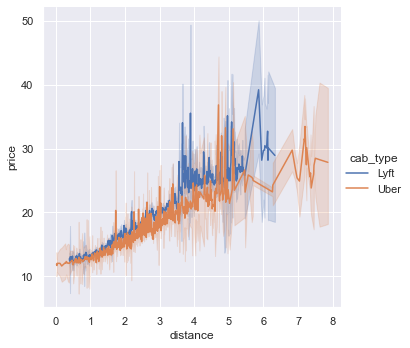

In [28]:
# 4. Bagaimana korelasi antara jarak yang di tempuh dengan harga yang di pesan?
sns.set(rc={'figure.figsize':(10, 5)})
sns.relplot(kind='line',
            x='distance',
            y='price',
            data=df,
            hue='cab_type')

In [29]:
data_final.groupby('distance')['price'].mean()

distance
0.02    11.850000
0.03    11.666667
0.04    12.000000
0.12    12.000000
0.17    11.583333
          ...    
7.45    26.000000
7.46    27.374444
7.50    28.472222
7.62    28.250000
7.86    27.833333
Name: price, Length: 549, dtype: float64

Dari output di atas dapat kita ketahui semakin jauh jarak tempuh maka semakin mahal harga yang harus di bayar penumpang.

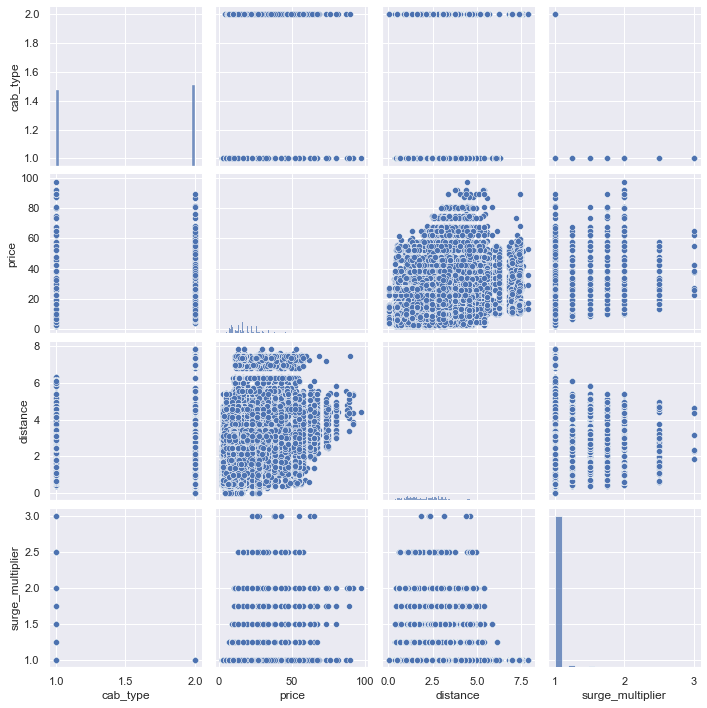

In [30]:
# Melihat distribusi setiap variabel kolom
sns.pairplot(data_final)

### F. Data Preprocessing

#### Label Encoder

In [31]:
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()

In [32]:
data_final['cab_type'] = label.fit_transform(data_final['cab_type'])
data_final['name'] = label.fit_transform(data_final['name'])
data_final['source'] = label.fit_transform(data_final['source'])
data_final['destination'] = label.fit_transform(data_final['destination'])
data_final['surge_multiplier'] = label.fit_transform(data_final['surge_multiplier'])

In [33]:
data_final.sample(5)

,source,destination,cab_type,name,price,distance,surge_multiplier
221156,7,5,1,10,10.5,0.56,0
229481,6,1,0,3,22.5,1.88,0
686988,7,6,1,8,8.0,1.08,0
50687,0,3,1,9,7.5,1.34,0
80301,8,1,1,9,11.5,2.61,0


In [34]:
data_final.isna().any()

source              False
destination         False
cab_type            False
name                False
price               False
distance            False
surge_multiplier    False
dtype: bool

In [35]:
data_final['source'].value_counts()

4     54197
0     53201
10    53201
2     53172
6     53171
3     53166
8     53164
9     53160
5     53147
11    52980
1     52841
7     52576
Name: source, dtype: int64

In [36]:
data_final['destination'].value_counts()

4     54192
0     53190
10    53189
5     53171
2     53171
3     53166
8     53165
6     53164
9     53159
11    52992
1     52840
7     52577
Name: destination, dtype: int64

In [37]:
data_final['cab_type'].value_counts()

1    330568
0    307408
Name: cab_type, dtype: int64

In [38]:
data_final['name'].value_counts()

10    55096
11    55096
1     55096
0     55095
9     55094
8     55091
2     51235
5     51235
4     51235
6     51235
3     51235
7     51233
Name: name, dtype: int64

### Data Scaling

In [39]:
scaler = StandardScaler()

In [40]:
data_ = data_final.drop(['price'], axis=1)

In [41]:
x = scaler.fit_transform(data_)
y = data_final['price']

In [42]:
# Split data pelatihan dan data pengujian
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [43]:
# Cek dimensi data

In [44]:
x_train.shape

(510380, 6)

In [45]:
y_train.shape

(510380,)

In [46]:
x_test.shape

(127596, 6)

In [47]:
y_test.shape

(127596,)

### G. Pendefinisian Model

Dataset ini termasuk pada salah satu Metode Machine Learning yaitu Supervised Learning, dengan menerapkan model Linear Regresi.

### Linear Regression

In [48]:
linear = LinearRegression()
model = linear.fit(x_train, y_train)

In [49]:
y_pred = model.predict(x_test)

In [50]:
model.score(x_train, y_train)

0.5139680054162881

In [51]:
model.score(x_test, y_test)

0.5174488473115331

In [52]:
import statsmodels.api as sm
x = sm.add_constant(x)

In [53]:
print(x)
print(y)

[[ 1.         -0.14399299  0.43570056 ...  0.41895927 -1.54063979
  -0.15890037]
 [ 1.         -0.14399299  0.43570056 ... -1.01219122 -1.54063979
  -0.15890037]
 [ 1.         -0.14399299  0.43570056 ... -0.15350093 -1.54063979
  -0.15890037]
 ...
 [ 1.          1.59516516  0.14583599 ...  0.99141946 -1.04742681
  -0.15890037]
 [ 1.          1.59516516  0.14583599 ... -1.29842131 -1.04742681
  -0.15890037]
 [ 1.          1.59516516  0.14583599 ...  0.70518936 -1.04742681
  -0.15890037]]
0          5.0
1         11.0
2          7.0
3         26.0
4          9.0
          ... 
693065     9.5
693066    13.0
693067     9.5
693069    27.0
693070    10.0
Name: price, Length: 637976, dtype: float64


### H. Pelatihan Model

In [54]:
# Regression model 
model2 = sm.OLS(y, x)

In [55]:
results = model2.fit()

In [56]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.515
Model:                            OLS   Adj. R-squared:                  0.515
Method:                 Least Squares   F-statistic:                 1.128e+05
Date:                Mon, 31 Oct 2022   Prob (F-statistic):               0.00
Time:                        12:38:33   Log-Likelihood:            -2.0990e+06
No. Observations:              637976   AIC:                         4.198e+06
Df Residuals:                  637969   BIC:                         4.198e+06
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         16.5451      0.008   2034.377      0.0

### I. Evaluasi Model

In [57]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [58]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
print('Root Mean Squared Error', rmse)
print('Mean Squared Error:', mse)
print('Mean Absolute Error:', mae)

Root Mean Squared Error 6.4860630136216635
Mean Squared Error: 42.069013416670934
Mean Absolute Error: 5.1564218573722735


In [59]:
print("accuracy :" + str(linear.score(x_test, y_test)))
print("variance :" + str(explained_variance_score(y_test, y_pred)))

accuracy :0.5174488473115331
variance :0.5174488983485114


In [60]:
errors1 = abs(y_pred - y_test)
print("Mean Absolute Error:", round(np.mean(errors1), 2), "degrees.")

Mean Absolute Error: 5.16 degrees.


In [61]:
lrmape = 100 * (errors1 / y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(lrmape)
print("Accuracy:", round(accuracy, 2), "%.")

Accuracy: 60.64 %.


### J. Model Inference

In [62]:
x_baru = {'cab_type':[2,3,4], 'distance':[4,5,6], 'name':[7,8,9], 'surge_multiplier':[1,2,3], 'source':[1,3,7], 'destination':[0,10,11]}
x_baru = pd.DataFrame(x_baru)

In [63]:
y_pred2 = model.predict(x_baru)
print('Prediksi Harga: ')
print(y_pred)

Prediksi Harga: 
[19.06253596 10.34561052 12.9972531  ... 24.24654498 12.70388126
 11.34589798]


### Kesimpulan

Dari analisis yang telah dilakukan menggunakan Linear Regression, yang berguna untuk mengestimasi hubungan antar variabel. 
Dapat kita ketahui bahwa terdapat :
- variabel X (independent) = cab_type, name, distance, source, destination, surge_multiplier
- variabel Y (dependent) = price

Dalam menganalisis hubungan fungsional antara variabel bebas X dan variabel respon Y, ada kemungkinan terjadi hubungan linier yang berbeda untuk setiap interval X. Apabila regresi X terhadap Y memiliki hubungan linier tertentu pada interval X tertentu, tetapi juga memiliki hubungan linier yang berbeda pada interval X yang lain.

Dapat kita simpulkan bahwa kasus ini bisa di analisis menggunakan Linear Regressi.

### Import the model

In [64]:
import pickle

save_model = pickle.dumps(model)
model_from_pickle = pickle.loads(save_model)
model_from_pickle.predict(x_test)

array([19.06253596, 10.34561052, 12.9972531 , ..., 24.24654498,
       12.70388126, 11.34589798])

In [65]:
import joblib

joblib.dump(model, 'linear_regression.pkl')
model_from_joblib = joblib.load('linear_regression.pkl')
model_from_joblib.predict(x_test)

array([19.06253596, 10.34561052, 12.9972531 , ..., 24.24654498,
       12.70388126, 11.34589798])